
# Chapter 2: Harmonics

## from ThinkDSP, by Allen Downey 
### modified by Renyuan Lyu

This notebook contains code examples from Chapter 2: Harmonics

http://greenteapress.com/thinkdsp/html/thinkdsp003.html


In [1]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import matplotlib.pyplot as plt

#help(plt.grid)
#plt.grid(True)

%precision 3
%matplotlib inline



Create a triangle signal and plot a 3 period segment.

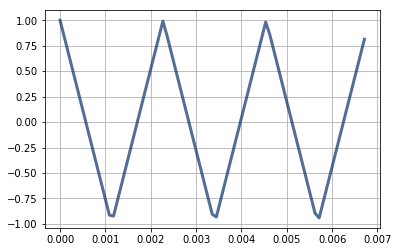

In [2]:
signal=   thinkdsp.TriangleSignal()

signal.plot()
plt.grid(True)

In [3]:
signal.amp, signal.freq, signal.period, signal.offset, signal.func

(1.000, 440, 0.002, 0, <ufunc 'sin'>)

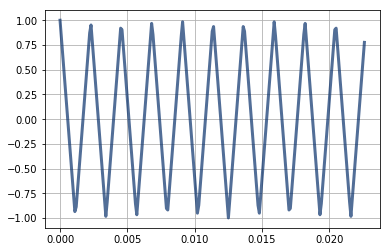

In [4]:
duration= signal.period * 10
segment=  signal.make_wave(duration, framerate= 10000)
segment.plot()

plt.grid(True)



#[dsp002_f01.png](attachment:dsp002_f01.png)

![dsp002_f01.png](https://raw.githubusercontent.com/renyuanL/_2019/master/ryFig/dsp002_f01.png)



#[dsp002_f02.png](attachment:dsp002_f02.png)
![dsp002_f02.png](https://raw.githubusercontent.com/renyuanL/_2019/master/ryFig/dsp002_f02.png)

#[dsp002_f03.png](attachment:dsp002_f03.png)

![dsp002_f03.png](https://raw.githubusercontent.com/renyuanL/_2019/master/ryFig/dsp002_f03.png)

### TriangleSignal

class TriangleSignal(Sinusoid):
    
    '''Represents a triangle signal.'''
    
    def evaluate(self, ts):
        '''
        Evaluates the signal at the given times.
        ts:      float array of times        
        returns: float wave array
        '''
        ts=       np.asarray(ts)
        cycles=   self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys=       np.abs(frac - 0.5)
        ys=       normalize(unbias(ys), self.amp)
        return ys

### Sinusoid

class Sinusoid(Signal):
    
    """Represents a sinusoidal signal."""

    def evaluate(self, ts):
        """
        Evaluates the signal at the given times.
        ts:      float array of times   
        returns: float wave array
        """
        ts=     np.asarray(ts)
        phases= PI2 * self.freq * ts + self.offset
        ys=     self.amp * self.func(phases)
        return  ys

In [5]:
import IPython.display
aUrl= 'https://renyuanl.github.io/_2019/rySong/01_秘密の花園.mp3'
IPython.display.Audio(url= aUrl)

Make a 1-second wave and play it.

In [6]:
segment= signal.make_wave(duration= 1, framerate= 10000)
segment.apodize()  #### 這是啥？
segment.make_audio()

#[dsp002_f04.png](attachment:dsp002_f04.png)

![dsp002_f04.png](https://raw.githubusercontent.com/renyuanL/_2019/master/ryFig/dsp002_f04.png)

## apodize 
(mathematics) To remove or smooth a sharp discontinuity in a mathematical function.

In [7]:
## apodize
### (mathematics) To remove or smooth a sharp discontinuity in a mathematical function.

def apodize(ys, framerate, denom= 20, duration= 0.1):
    
    """Tapers (削尖) the amplitude at the beginning and end of the signal.

    Tapers either the given duration of time or the given
    fraction of the total duration, whichever is less.

    ys:        wave array
    framerate: int frames per second
    denom:     float fraction of the segment to taper
    duration:  float duration of the taper in seconds

    returns:   wave array
    """
    # a fixed fraction of the segment
    n=  len(ys)
    k1= n // denom

    # a fixed duration of time
    k2= int(duration * framerate)

    k=  max(k1, k2)             # 前後要削尖的點數

    w1= np.linspace(0, 1, k)    # 從 0 漸增到 1
    w2= np.ones(n - 2*k)        # 維持水平
    w3= np.linspace(1, 0, k)    # 從 1 漸減到 0

    window= np.concatenate((w1, w2, w3))    # 把 3段 w 連接起來成為【梯形窗】
    
    ys= ys * window  # 把原始信號波形乘上梯形窗
    
    return  ys  

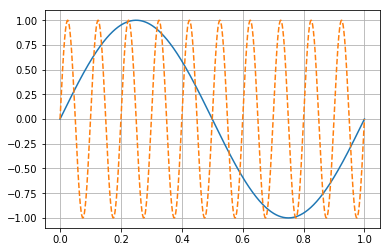

In [8]:
import numpy as np
import matplotlib.pyplot as plt

t= np.linspace(0,1,1001)
y= np.sin(2*np.pi*t)
plt.plot(t,y, '-')

F= 10
y= np.sin(2 *np.pi *F *t)
plt.plot(t,y, '--')

plt.grid(True)

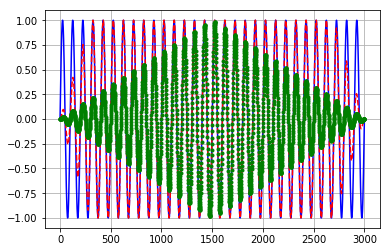

In [9]:
Ts= 1/1000  # sampling period
Fs= 1/Ts    # sampling frequency

F= 10       # signal frequency, in Hz
T= 3        # signal duration,  in sec

n= np.arange(T*Fs+1)  # sampling at sampling frequency = Fs
t= n * Ts

y= np.sin(2 *np.pi *F *t)

plt.plot(n,y,'b-')

y1= apodize(y, Fs, denom= 10)  ##### 測試 apodize()
plt.plot(y1,'r--')

y2= apodize(y, Fs, denom= 2)  ##### 測試 apodize()
plt.plot(y2,'g.')

plt.grid(True)

### for Triangular signal,

Make a 0.5 second wave and compute its spectrum.

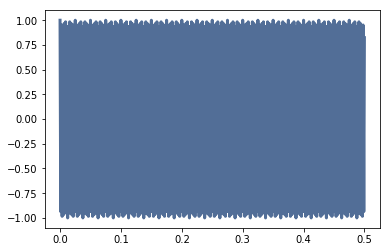

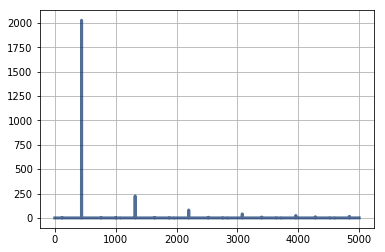

In [10]:
wave= signal.make_wave(duration= .5, framerate= 10000)
wave.plot()

plt.figure()
spectrum= wave.make_spectrum()
spectrum.plot()
plt.grid(True)

Make a square signal and plot a 3 period segment.

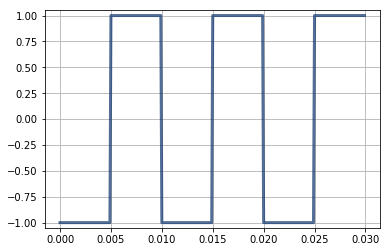

In [11]:
signal=   thinkdsp.SquareSignal(100)
duration= signal.period*3
segment=  signal.make_wave(duration, framerate=10000)
segment.plot()

thinkplot.config(ylim= [-1.05, 1.05], legend= False)
plt.grid(True)

Make a 1 second wave and play it.

In [12]:
segment = signal.make_wave(duration=1, framerate=10000)
segment.apodize()
segment.make_audio()

Make a 0.5 second wave and compute its spectrum.

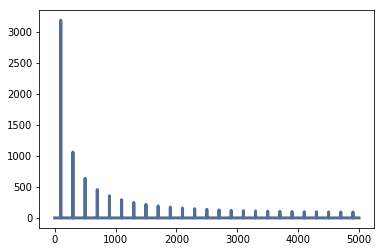

In [13]:
wave=     signal.make_wave(duration= 0.5, framerate= 10000)
spectrum= wave.make_spectrum()
spectrum.plot()

Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

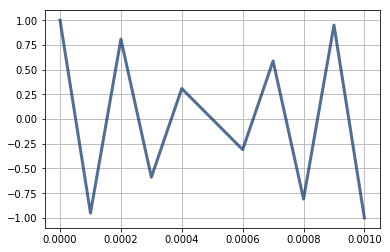

In [14]:
framerate= 10000

signal=   thinkdsp.CosSignal(4500)
duration= signal.period*5
segment=  signal.make_wave(duration, framerate=framerate)
segment.plot()

plt.grid(True)

Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

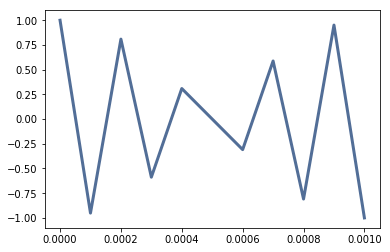

In [15]:
signal=  thinkdsp.CosSignal(5500)
segment= signal.make_wave(duration, framerate=framerate)
segment.plot()

Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

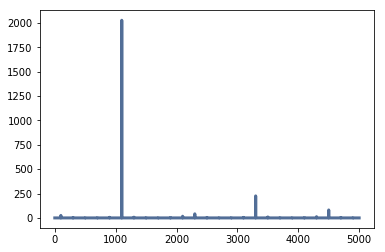

In [16]:
signal=   thinkdsp.TriangleSignal(1100)
segment=  signal.make_wave(duration=0.5, framerate=10000)
spectrum= segment.make_spectrum()
spectrum.plot()

Explore the implementation of Wave.make_spectrum.  Make a triangle wave.

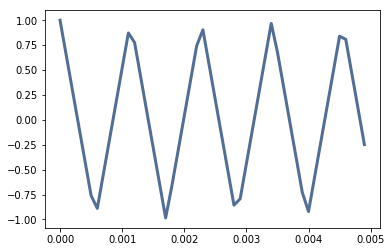

In [17]:
signal=  thinkdsp.TriangleSignal(880)
wave=    signal.make_wave(duration=1, framerate=10000)
segment= wave.segment(duration=0.005)
segment.plot()

Play it.

In [18]:
wave.make_audio()

Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [19]:
import numpy
hs= numpy.fft.rfft(wave.ys)
hs

array([-1.700e-12+0.000e+00j,  1.324e-12+1.827e-12j,
        1.161e-12-1.248e-12j, ..., -1.542e-13-4.558e-13j,
       -1.690e-12+9.987e-16j,  7.350e-13+0.000e+00j])

Compute the frequencies that match up with the elements of the FFT.

In [20]:
f_max= framerate / 2.0
fs=    numpy.linspace(0, f_max, len(hs))
len(hs)

5001

Plot the magnitudes vs the frequencies.

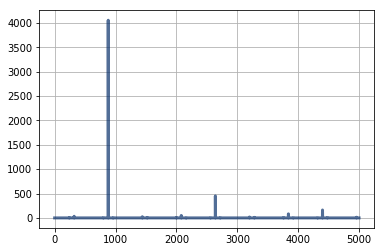

In [21]:
magnitude= numpy.absolute(hs)
thinkplot.plot(fs, magnitude)

plt.grid(True)

Plot the phases vs the frequencies.

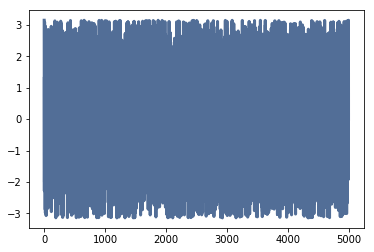

In [22]:
angle= numpy.angle(hs)
thinkplot.plot(fs, angle)

Shuffle the phases.

[ 3.142  0.944 -0.822 ... -1.897  3.141  0.   ]
[-1.787  1.075 -0.126 ...  2.508  0.872  0.536]


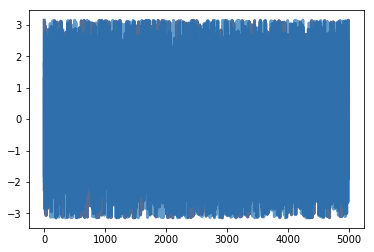

In [23]:
import random

# 之前
print(angle)
thinkplot.plot(fs, angle)

random.shuffle(angle)  # 順序打亂，重新洗牌。

# 之後
print(angle)
thinkplot.plot(fs, angle)

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, we we compute $A e^{i \phi}$

In [24]:
#i= complex(0, 1)  # 直接用 1j 就可以了

spectrum.hs = magnitude * numpy.exp(1j * angle)

Convert the spectrum back to a wave (which uses irfft).

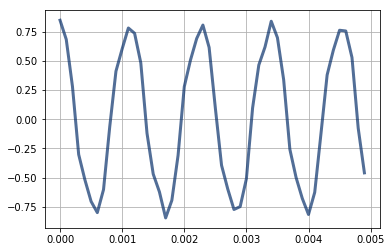

In [25]:
wave=    spectrum.make_wave()   ### 逆轉換 頻譜 成為波形

segment= wave.segment(duration= 0.005)
segment.plot()
plt.grid(True)

Play the wave with the shuffled phases.

In [26]:
wave.make_audio()

Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [27]:
def view_harmonics(freq, framerate):
    
    signal=   thinkdsp.SawtoothSignal(freq)
    wave=     signal.make_wave(duration= .1, 
                               framerate= framerate)
    
    wave.plot()
    plt.grid(True)
    #wave.make_audio()
    
    spectrum= wave.make_spectrum()
    
    plt.figure()
    spectrum.plot(color= 'blue')
    thinkplot.config(xlabel= 'frequency', 
                     ylabel= 'amplitude')
    plt.grid(True)

    

In [28]:
#from IPython.html.widgets import interact
from ipywidgets   import interact
from IPython.html import widgets

slider1= widgets.FloatSlider(min=  100, max= 10000, value=   100, step=  100)
slider2= widgets.FloatSlider(min= 5000, max= 40000, value= 10000, step= 1000)

C:\Anaconda52_Py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [29]:
interact(view_harmonics, 
         freq=      slider1, 
         framerate= slider2)

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

<function __main__.view_harmonics(freq, framerate)>

# Find 1 or more exercises from the below, 
## try to do it, and present to the instructor. 

# 2.5  Exercises

Solutions to these exercises are in chap02soln.ipynb.

* Exercise 1   
    - If you use Jupyter, load chap02.ipynb and try out the examples. You can also view the notebook at http://tinyurl.com/thinkdsp02.
* 
* Exercise 2   
    - A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave
    - Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

    - Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?
* 
* Exercise 3   
    - Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?
* 
* Exercise 4   
    - If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean?
    - Try this experiment:
    -  
    -  Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
    -  Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
    -  Set spectrum.hs[0] = 100. What effect does this operation have on the waveform? Hint: Spectrum provides a method called make_wave that computes the Wave that corresponds to the Spectrum.
* 
* Exercise 5   
    - Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0.
    -  Test your function using a square, triangle, or sawtooth wave.
    -  
    -  Compute the Spectrum and plot it.
    -  Modify the Spectrum using your function and plot it again.
    -  Use Spectrum.make_wave to make a Wave from the modified Spectrum, and listen to it. What effect does this operation have on the signal?
    -  
* Exercise 6   
    - Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f2. Can you find a waveform that has even and odd harmonics that drop off like 1/f2?

    - Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.